In [1]:
from analysis import *
from cleaning import *

# Importing data

In [2]:
file_path = './data/dice_jobs_list.csv'

In [3]:
try:
    dice = pd.read_csv(file_path)
except FileNotFoundError:
    print("Error: Could not find file")

In [4]:
dice.head()

,salary,crawled_at,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,raw_description,skills,latitude,_id,company,posted_at,source
0,Depends on Experience,"04/16/2021, 19:51:28","Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC","<div class=""highlight-black"" id=""jobdescSec"">\...",Azure AD,35.227085,6ea0725a-554f-5db9-8fa3-81b8eea3d9c6,"Nutech Systems, Inc.",2021-04-13T22:31:54Z,https://www.dice.com
1,Depends on Experience,"04/16/2021, 19:51:31",We are looking for a Ad Operations Associate f...,Ad Operations Associate,https://www.dice.com/jobs/detail/Ad-Operations...,NaN,IT Software,Contract W2,0.000000,USD,IT Diploma/Degree/Certification,NaN,NaN,"<div class=""highlight-black"" id=""jobdescSec"">\...","Account management, Advertising, Content marke...",0.000000,68afe519-ecca-5fe8-a553-2b4511d367e2,"Software Resources, Inc.",2021-04-12T16:31:29Z,https://www.dice.com
2,Depends on Experience,"04/16/2021, 19:51:34",Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","<div class=""highlight-black"" id=""jobdescSec"">\...","Campaign management, Media buying, Analytics, ...",37.630490,9221c243-e03a-5c7c-96f6-37d8edcd39a6,"Tranzeal, Inc.",2021-04-14T20:15:06Z,https://www.dice.com
3,Market,"04/16/2021, 19:51:37",Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","<div class=""highlight-black"" id=""jobdescSec"">\...","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,493b1cc2-3c1e-5cd4-bd3e-d4a6403b2501,"Software Management Consultants, Inc.",2021-04-01T01:05:06Z,https://www.dice.com
4,Market,"04/16/2021, 19:51:39",Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","<div class=""highlight-black"" id=""jobdescSec"">\...","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,34d5e29c-0645-5567-b4c1-2820abcc316f,"Software Management Consultants, Inc.",2021-04-10T01:05:17Z,https://www.dice.com


In [5]:
dice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   salary                  9813 non-null   object 
 1   crawled_at              9814 non-null   object 
 2   description             9814 non-null   object 
 3   title                   9814 non-null   object 
 4   url                     9814 non-null   object 
 5   country                 8613 non-null   object 
 6   industry                9814 non-null   object 
 7   job_type                9814 non-null   object 
 8   longitude               9814 non-null   float64
 9   currency                9814 non-null   object 
 10  education_requirements  9814 non-null   object 
 11  postal_code             8232 non-null   object 
 12  location                8602 non-null   object 
 13  raw_description         9814 non-null   object 
 14  skills                  9569 non-null   

# Cleaning the dataset

In [6]:
df = dice.drop(['crawled_at', 'raw_description', '_id', 'source'], axis=1)
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13T22:31:54Z
1,Depends on Experience,We are looking for a Ad Operations Associate f...,Ad Operations Associate,https://www.dice.com/jobs/detail/Ad-Operations...,NaN,IT Software,Contract W2,0.000000,USD,IT Diploma/Degree/Certification,NaN,NaN,"Account management, Advertising, Content marke...",0.000000,"Software Resources, Inc.",2021-04-12T16:31:29Z
2,Depends on Experience,Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","Campaign management, Media buying, Analytics, ...",37.630490,"Tranzeal, Inc.",2021-04-14T20:15:06Z
3,Market,Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,"Software Management Consultants, Inc.",2021-04-01T01:05:06Z
4,Market,Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,"Software Management Consultants, Inc.",2021-04-10T01:05:17Z


In [7]:
data_types = {'salary': 'string', 'description': 'string', 'title': 'string', 'url': 'string',
             'country': 'string', 'industry': 'string', 'job_type': 'string', 'longitude': 'float64', 'currency': 'string',
             'education_requirements': 'string', 'postal_code': 'string', 'location': 'string', 'skills': 'string', 
             'latitude': 'float64', 'company': 'string', 'posted_at': 'datetime64'}
df = df.astype(data_types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  9813 non-null   string        
 1   description             9814 non-null   string        
 2   title                   9814 non-null   string        
 3   url                     9814 non-null   string        
 4   country                 8613 non-null   string        
 5   industry                9814 non-null   string        
 6   job_type                9814 non-null   string        
 7   longitude               9814 non-null   float64       
 8   currency                9814 non-null   string        
 9   education_requirements  9814 non-null   string        
 10  postal_code             8232 non-null   string        
 11  location                8602 non-null   string        
 12  skills                  9569 non-null   string  

In [8]:
df.loc[df.skills.isna(), 'skills']

87      <NA>
91      <NA>
261     <NA>
262     <NA>
263     <NA>
        ... 
9491    <NA>
9532    <NA>
9545    <NA>
9622    <NA>
9786    <NA>
Name: skills, Length: 245, dtype: string

In [9]:
df['skills'].replace(np.nan, '', inplace=True)
df.loc[df.skills.isna(), 'skills']

Series([], Name: skills, dtype: string)

In [10]:
df.replace('', np.nan, inplace=True)

In [11]:
df.loc[df.isna().any(axis=1), :]

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
1,Depends on Experience,We are looking for a Ad Operations Associate f...,Ad Operations Associate,https://www.dice.com/jobs/detail/Ad-Operations...,<NA>,IT Software,Contract W2,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Account management, Advertising, Content marke...",0.000000,"Software Resources, Inc.",2021-04-12 16:31:29
7,No Salary Listed,Flexion is currently seeking a REMOTE AAD/AD A...,REMOTE AAD/AD Active Directory Consultant (3669),https://www.dice.com/jobs/detail/REMOTE-AAD%26...,<NA>,IT Software,Contract W2,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Active Directory, Azure Active Directory",0.000000,Flexion Inc,2021-04-06 12:30:55
13,$65 - $70,JOB Description :Solution Architect- Microsoft...,Solution Architect,https://www.dice.com/jobs/detail/Solution-Arch...,US,IT Software,Contract W2,-104.99025,USD,IT Diploma/Degree/Certification,<NA>,"Denver, Colorado","Microsoft AD, ForgeRock, IIQ, .Net stack",39.739235,Igen Systems,2021-04-07 14:46:16
17,"$100,000 - $130,000",Remote position - work from home - as some of ...,Identity Security Consultant,https://www.dice.com/jobs/detail/Identity-Secu...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Identity Access Management, Privilege Access M...",0.000000,XMS Solutions Inc,2021-03-30 20:45:21
22,"$60,000 - $120,000",BlueSage Solutions is hiring. Cutting edge tec...,Java Software Developer,https://www.dice.com/jobs/detail/Java-Software...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Java, Azure, MySQL, GitHub, Groovy, Sencha, Ex...",0.000000,Blue Sage Solutions,2021-04-09 19:30:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,Depends on Experience,"Minimum Requirements:3+ years, SharePoint, One...",SharePoint Engineer,https://www.dice.com/jobs/detail/SharePoint-En...,<NA>,IT Software,Contract W2,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"SharePoint, O365, Active Directory, Azure AD",0.000000,Indotronix International Corp,2021-03-23 18:18:12
9806,"$60,000 - $120,000",BlueSage Solutions is hiring. Cutting edge tec...,Java Software Developer,https://www.dice.com/jobs/detail/Java-Software...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Java, Azure, MySQL, GitHub, Groovy, Sencha, Ex...",0.000000,Blue Sage Solutions,2021-04-09 19:30:02
9809,Depends on Experience,LumenVox has an exciting opportunity for a Sof...,Software Developer - Remote,https://www.dice.com/jobs/detail/Software-Deve...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"natural language processing, voice biometrics,...",0.000000,LumenVox,2021-04-14 14:15:40
9810,"$80,000 - $110,000",WANTED: Full-Stack Node JS/React (Node.js) (10...,Full-Stack Node JS/React Developer - 100% Remote,https://www.dice.com/jobs/detail/Full%26%2345S...,<NA>,IT Software,Full Time,0.00000,USD,IT Diploma/Degree/Certification,<NA>,<NA>,"Engineering, HTML, JavaScript, MongoDB, Node.j...",0.000000,Giftnix,2021-04-06 18:30:02


# Only keeping US data

In [12]:
df['country'].value_counts()

US    8438
CA      78
IN      51
us      15
UN       6
DK       6
BR       5
ca       3
BG       3
GB       3
IE       2
U.       1
LT       1
NL       1
Name: country, dtype: Int64

In [13]:
df.loc[df['country']=='us','location']

568       Minneapolis, MN
1942         Dearborn, MI
2096       Cincinnati, OH
2291    Sandy Springs, GA
4592       Cincinnati, OH
4642       Cincinnati, OH
4644       Cincinnati, OH
4648       Cincinnati, OH
4649       Cincinnati, OH
5371             Lehi, UT
5979         Dearborn, MI
5980         Dearborn, MI
8036      Santa Clara, CA
8105      Santa Clara, CA
8301          Ashburn, VA
Name: location, dtype: string

In [14]:
df['country'] = df['country'].replace({'us': 'US'})

In [15]:
df['country'].value_counts()

US    8453
CA      78
IN      51
UN       6
DK       6
BR       5
ca       3
BG       3
GB       3
IE       2
U.       1
LT       1
NL       1
Name: country, dtype: Int64

In [16]:
df = df.loc[(df['country']=='US'), :]
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54
2,Depends on Experience,Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","Campaign management, Media buying, Analytics, ...",37.630490,"Tranzeal, Inc.",2021-04-14 20:15:06
3,Market,Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,"Software Management Consultants, Inc.",2021-04-01 01:05:06
4,Market,Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,"Software Management Consultants, Inc.",2021-04-10 01:05:17
5,Depends on Experience,"Mandatory:· Sr level experience, Netwo...",AD/DNS Engineer,https://www.dice.com/jobs/detail/AD%26%2347DNS...,US,IT Software,"Contract W2, Contract Independent",-117.900290,USD,IT Diploma/Degree/Certification,92821,"Brea, CA","Active Directory, DNS, Networking, Routing, Su...",33.916473,The Proven Method,2021-04-08 19:45:59


In [17]:
df['country'].value_counts()

US    8453
Name: country, dtype: Int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8453 entries, 0 to 9812
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  8452 non-null   string        
 1   description             8453 non-null   string        
 2   title                   8453 non-null   string        
 3   url                     8453 non-null   string        
 4   country                 8453 non-null   string        
 5   industry                8453 non-null   string        
 6   job_type                8453 non-null   string        
 7   longitude               8453 non-null   float64       
 8   currency                8453 non-null   string        
 9   education_requirements  8453 non-null   string        
 10  postal_code             8085 non-null   string        
 11  location                8390 non-null   string        
 12  skills                  8212 non-null   string  

# Extraction state and adding region column

In [19]:
df['location'].value_counts()

New York, NY         275
Atlanta, GA          243
San Francisco, CA    206
Chicago, IL          187
Austin, TX           177
                    ... 
Hillsdale, MI          1
Sharon, PA             1
Warrenville, IL        1
Ames, IA               1
Harrison, NY           1
Name: location, Length: 1111, dtype: Int64

In [20]:
us_states_file_path = './data/states.csv'
try:
    us_states = pd.read_csv(us_states_file_path, dtype={'State': 'category', 'State Code': 'category', 
                                                         'Region': 'category', 'Division': 'category'})
    us_states.rename(columns=lambda x: x.lower(), inplace=True)
    us_states.head()
except FileNotFoundError:
    print("Error: Could not find file")

In [21]:
us_states['state code'].unique().size

51

In [22]:
us_states['region'].unique()

['West', 'South', 'Northeast', 'Midwest']
Categories (4, object): ['Midwest', 'Northeast', 'South', 'West']

In [23]:
df['state'] = df['location'].str.strip().str[-2:]
df['city'] = df['location'].str.strip().str[:-4]

# This seemed repetitive so we commented it out
# Filter the dataset to include only job postings with a valid US state code
# df = df[df['state'].isin(us_states['state code'])]

# Now data['states'].unique() should only contain valid US state codes
df['state'].unique()

df

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at,state,city
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,Charlotte
2,Depends on Experience,Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","Campaign management, Media buying, Analytics, ...",37.630490,"Tranzeal, Inc.",2021-04-14 20:15:06,CA,San Bruno
3,Market,Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,"Software Management Consultants, Inc.",2021-04-01 01:05:06,WA,Seattle
4,Market,Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,"Software Management Consultants, Inc.",2021-04-10 01:05:17,FL,Tampa
5,Depends on Experience,"Mandatory:· Sr level experience, Netwo...",AD/DNS Engineer,https://www.dice.com/jobs/detail/AD%26%2347DNS...,US,IT Software,"Contract W2, Contract Independent",-117.900290,USD,IT Diploma/Degree/Certification,92821,"Brea, CA","Active Directory, DNS, Networking, Routing, Su...",33.916473,The Proven Method,2021-04-08 19:45:59,CA,Brea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9805,Depends on Experience,"In partnership with ExxonMobil, Synthetic Geno...",Senior Software Engineer,https://www.dice.com/jobs/detail/Senior-Softwa...,US,IT Software,Full Time,-117.255850,USD,IT Diploma/Degree/Certification,92037,"La Jolla, CA","Amazon Web Services, Node.js, React.js, Angula...",32.828327,Synthetic Genomics,2021-04-06 20:06:55,CA,La Jolla
9807,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,27601,"Raleigh, NC","AAA game engine experience, C/C++ programming,...",35.779590,"Concurrents, Inc",2021-04-09 15:17:11,NC,Raleigh
9808,"$82,000 - $108,000","Headquarters: Bozeman, MontanaStart Date: Imme...",Senior .Net Cloud Developer,https://www.dice.com/jobs/detail/Senior-.Net-C...,US,IT Software,Full Time,-111.042930,USD,IT Diploma/Degree/Certification,59715,"Bozeman, MT",".NET, Attention to detail, C#, CSS, Collaborat...",45.677000,TEXbase Inc,2021-04-08 15:30:30,MT,Bozeman
9811,Depends on Experience,"Yale University, conveniently located between ...",Senior Software Engineer,https://www.dice.com/jobs/detail/Senior-Softwa...,US,IT Software,Full Time,-72.927890,USD,IT Diploma/Degree/Certification,06501,"New Haven, CT","Sybase, MySQL, MongoDb, Elasticsearch",41.308273,Yale University,2021-04-06 17:45:36,CT,New Haven


In [24]:
# Extracting the 'city' and 'state' as 2 seperate columns from 'location' column
try:
    df = df.merge(us_states, left_on='state', right_on='state code', validate='m:1', suffixes=['_d', '_s'])
    df.drop(['state code', 'state_s'], axis=1, inplace=True)
    col_name = list(df.columns)
    col_name[col_name.index('state_d')] = 'state'
    df.columns = col_name
except KeyError as e:
    print(f"Error: Missing column '{e.args[0]}' in dataframe")
except pd.errors.MergeError as e:
    print(f"Error: Merge failed with message '{e}'")

In [25]:
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at,state,city,region,division
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,Charlotte,South,South Atlantic
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",".net, oauth, valet key, api, azure AD",35.227085,"Paramount Software Solutions, Inc",2021-04-12 14:45:43,NC,Charlotte,South,South Atlantic
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,27601,"Raleigh, NC","AAA game engine experience, C/C++ programming,...",35.779590,"Concurrents, Inc",2021-04-09 15:17:11,NC,Raleigh,South,South Atlantic
3,No Salary Listed,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,28204,"Charlotte, NC","Azure, Active Directory",35.214584,Apar Technologies,2021-04-14 13:30:37,NC,Charlotte,South,South Atlantic
4,No Salary Listed,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,27704,"Durham, NC","SSO, SAML, Azure AD, OAuth, OpenID",36.034160,Droisys,2020-03-06 22:05:41,NC,Durham,South,South Atlantic


In [26]:
df = df.astype({'state': 'category', 'currency': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 8240
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  8240 non-null   string        
 1   description             8241 non-null   string        
 2   title                   8241 non-null   string        
 3   url                     8241 non-null   string        
 4   country                 8241 non-null   string        
 5   industry                8241 non-null   string        
 6   job_type                8241 non-null   string        
 7   longitude               8241 non-null   float64       
 8   currency                8241 non-null   category      
 9   education_requirements  8241 non-null   string        
 10  postal_code             8036 non-null   string        
 11  location                8241 non-null   string        
 12  skills                  8013 non-null   string  

In [27]:
# checking for exceptions
df.currency.unique()

['USD']
Categories (1, string): [USD]

In [28]:
#checking for null values
df[['longitude', 'latitude', 'location']].isna().any().sum()

0

# Cleaning salary column

In [29]:
df['salary'] = df.salary.apply(lambda x: x.lower() if pd.notna(x) else np.nan)

In [30]:
df['salary'].replace('no salary listed', np.nan, inplace=True)

In [31]:
df = df.astype({'salary': 'string'})

In [32]:
df.loc[df.salary.isna(), 'salary']

3       <NA>
4       <NA>
6       <NA>
8       <NA>
10      <NA>
        ... 
8235    <NA>
8236    <NA>
8237    <NA>
8239    <NA>
8240    <NA>
Name: salary, Length: 4089, dtype: string

In [33]:
# Calling function from cleaning.py
detect_number('45')

True

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 8240
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  4152 non-null   string        
 1   description             8241 non-null   string        
 2   title                   8241 non-null   string        
 3   url                     8241 non-null   string        
 4   country                 8241 non-null   string        
 5   industry                8241 non-null   string        
 6   job_type                8241 non-null   string        
 7   longitude               8241 non-null   float64       
 8   currency                8241 non-null   category      
 9   education_requirements  8241 non-null   string        
 10  postal_code             8036 non-null   string        
 11  location                8241 non-null   string        
 12  skills                  8013 non-null   string  

In [35]:
salary_with_numbers = df['salary'].apply(lambda x: True if (pd.notna(x) and detect_number(x)) else False)
salary_with_numbers

0       False
1        True
2        True
3       False
4       False
        ...  
8236    False
8237    False
8238     True
8239    False
8240    False
Name: salary, Length: 8241, dtype: bool

In [36]:
df.loc[~salary_with_numbers, 'salary'].unique()

<StringArray>
[               'depends on experience',
                                   <NA>,
                          'competitive',
                               'market',
                                    '$',
                  'based on experience',
                       'market related',
              '$ depends on experience',
                              '$market',
                       '$as per market',
                           'negotiable',
                          '$negotiable',
                                    '-',
                                '$best',
                                 '$doe',
                                '$open',
 'contract to hire with great benefits',
                                 '-usd',
                  '$as per market rate',
                                 '$tbd',
           'commensurate on experience',
              'depending on experience',
                      'depends on exp.',
                        '$$$negotiable',
  

In [37]:
# Calling function from cleaning.py
find_salary('100,00,00,.453k')

[1000000453.0]

In [38]:
# Calling function from cleaning.py
salaries_and_frequency = df.loc[salary_with_numbers, 'salary'].apply(lambda x: det_salary_range_and_frequency(x))

In [39]:
sal_df = pd.DataFrame(salaries_and_frequency.to_dict()).transpose()
sal_df

,min_salary,max_salary,frequency
1,55.0,60.0,hourly
2,80000.0,120000.0,yearly
7,55.0,60.0,hourly
14,100000.0,130000.0,yearly
15,250000.0,250000.0,yearly
...,...,...,...
8224,50.0,50.0,hourly
8225,60000.0,70000.0,yearly
8226,65000.0,75000.0,yearly
8227,65000.0,75000.0,yearly


In [40]:
df.loc[salary_with_numbers, ['min_salary', 'max_salary', 'frequency']] = sal_df

In [41]:
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,latitude,company,posted_at,state,city,region,division,min_salary,max_salary,frequency
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,Charlotte,South,South Atlantic,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,35.227085,"Paramount Software Solutions, Inc",2021-04-12 14:45:43,NC,Charlotte,South,South Atlantic,55.0,60.0,hourly
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,35.779590,"Concurrents, Inc",2021-04-09 15:17:11,NC,Raleigh,South,South Atlantic,80000.0,120000.0,yearly
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,35.214584,Apar Technologies,2021-04-14 13:30:37,NC,Charlotte,South,South Atlantic,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,36.034160,Droisys,2020-03-06 22:05:41,NC,Durham,South,South Atlantic,NaN,NaN,NaN


In [42]:
df.loc[df[['min_salary', 'max_salary', 'frequency']].notna().any(axis=1), ['min_salary', 'max_salary', 'frequency']]

,min_salary,max_salary,frequency
1,55.0,60.0,hourly
2,80000.0,120000.0,yearly
7,55.0,60.0,hourly
14,100000.0,130000.0,yearly
15,250000.0,250000.0,yearly
...,...,...,...
8224,50.0,50.0,hourly
8225,60000.0,70000.0,yearly
8226,65000.0,75000.0,yearly
8227,65000.0,75000.0,yearly


In [43]:
# defining the datatypes
df = df.astype({'min_salary': 'float64', 'max_salary': 'float64', 'frequency': 'category'})

In [44]:
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,latitude,company,posted_at,state,city,region,division,min_salary,max_salary,frequency
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,35.227085,"Nutech Systems, Inc.",2021-04-13 22:31:54,NC,Charlotte,South,South Atlantic,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,35.227085,"Paramount Software Solutions, Inc",2021-04-12 14:45:43,NC,Charlotte,South,South Atlantic,55.0,60.0,hourly
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,35.779590,"Concurrents, Inc",2021-04-09 15:17:11,NC,Raleigh,South,South Atlantic,80000.0,120000.0,yearly
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,35.214584,Apar Technologies,2021-04-14 13:30:37,NC,Charlotte,South,South Atlantic,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,36.034160,Droisys,2020-03-06 22:05:41,NC,Durham,South,South Atlantic,NaN,NaN,NaN


In [45]:
# Calling functions from cleaning.py
df['min_annual_comp'] = df.apply(lambda row: calc_min_comp(row), axis=1)
df['max_annual_comp'] = df.apply(lambda row: calc_max_comp(row), axis=1)
df.head()

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,posted_at,state,city,region,division,min_salary,max_salary,frequency,min_annual_comp,max_annual_comp
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,2021-04-13 22:31:54,NC,Charlotte,South,South Atlantic,NaN,NaN,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,2021-04-12 14:45:43,NC,Charlotte,South,South Atlantic,55.0,60.0,hourly,105600.0,115200.0
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,2021-04-09 15:17:11,NC,Raleigh,South,South Atlantic,80000.0,120000.0,yearly,80000.0,120000.0
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,2021-04-14 13:30:37,NC,Charlotte,South,South Atlantic,NaN,NaN,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,2020-03-06 22:05:41,NC,Durham,South,South Atlantic,NaN,NaN,NaN,NaN,NaN


In [46]:
# calculating mean
df['mean_salary'] = (df['min_annual_comp'] + df['max_annual_comp']) / 2

In [47]:
# Exception cases that were causing errors
df_mt = df.loc[df.state=='MT', :]
df_mt

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,state,city,region,division,min_salary,max_salary,frequency,min_annual_comp,max_annual_comp,mean_salary
3980,"$82,000 - $108,000","Headquarters: Bozeman, MontanaStart Date: Imme...",Senior .Net Cloud Developer,https://www.dice.com/jobs/detail/Senior-.Net-C...,US,IT Software,Full Time,-111.04293,USD,IT Diploma/Degree/Certification,...,MT,Bozeman,West,Mountain,82000.0,108000.0,yearly,82000.0,108000.0,95000.0
3981,$115k - 140k per year,"job summary:What You'll Need:BS CS/EE/CE, or e...",Software Engineer,https://www.dice.com/jobs/detail/Software-Engi...,US,IT Software,Full Time,-111.06422,USD,IT Diploma/Degree/Certification,...,MT,Bozeman,West,Mountain,115000.0,140000.0,yearly,115000.0,140000.0,127500.0
3982,<NA>,Job Description Skills details Required ...,Google Cloud Platform Developer,https://www.dice.com/jobs/detail/Google-Cloud-...,US,IT Software,"Contract Corp-To-Corp, C2H Corp-To-Corp",0.00000,USD,IT Diploma/Degree/Certification,...,MT,St. Louis,West,Mountain,NaN,NaN,NaN,NaN,NaN,NaN
3983,"$82,000 - $108,000","Headquarters: Bozeman, MontanaStart Date: Imme...",Senior .Net Cloud Developer,https://www.dice.com/jobs/detail/Senior-.Net-C...,US,IT Software,Full Time,-111.04293,USD,IT Diploma/Degree/Certification,...,MT,Bozeman,West,Mountain,82000.0,108000.0,yearly,82000.0,108000.0,95000.0


In [48]:
sal_num_mt = df_mt['salary'].apply(lambda x: True if (pd.notna(x) and detect_number(x)) else False)
sal_num_mt

3980     True
3981     True
3982    False
3983     True
Name: salary, dtype: bool

In [49]:
salaries_and_frequency = df_mt.loc[salary_with_numbers, 'salary'].apply(lambda x: det_salary_range_and_frequency(x))
salaries_and_frequency

3980    {'min_salary': 82000.0, 'max_salary': 108000.0...
3981    {'min_salary': 115000.0, 'max_salary': 140000....
3983    {'min_salary': 82000.0, 'max_salary': 108000.0...
Name: salary, dtype: object

# Cost of living index data import

In [50]:
try:    
    cost_of_living_file_path = './data/cost_of_living_index.csv'
    cost_of_living_dtypes = {'city': 'string', 'state':'string', 'cost_of_living_index': 'float64'}
    cost_of_living_df = pd.read_csv(cost_of_living_file_path)
    cost_of_living_df.columns = list(map(lambda x: x.lower().replace(' ', '_'), list(cost_of_living_df.columns)))
    cost_of_living_df = cost_of_living_df.astype(cost_of_living_dtypes)
except FileNotFoundError:
    print("Error: file not found")
print(cost_of_living_df.info())
cost_of_living_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  510 non-null    string 
 1   state                 510 non-null    string 
 2   cost_of_living_index  510 non-null    float64
dtypes: float64(1), string(2)
memory usage: 12.1 KB
None


,city,state,cost_of_living_index
0,Abilene,TX,89.1
1,Adrian,MI,90.5
2,Akron,OH,89.4
3,Alamogordo,NM,85.8
4,Albany,GA,87.3


# Skills cleaning

In [51]:
all_skill_list = ['Azure AD',
                      '.net', ' oauth', ' valet key', ' api', ' azure AD',
                      'AAA game engine experience', ' C/C++ programming', ' BS CS/CE',
                      'Azure', ' Active Directory',
                      'SSO', ' SAML', ' OAuth', ' OpenID',
                      'Window', ' AD', ' SCCM', ' ServiceNow', ' IT infrastructure', ' DHCP', ' DNS',
                      'Python', ' PHP', ' MySQL', ' SDLC',
                      'ASP', ' .NET', ' SQL',
                      'JavaScript', ' HTML', ' SQL', ' .Net', ' C#', ' CSS', ' J2EE', ' Java',
                      'Research', ' Test', ' A/V', ' Assembly', ' Python', ' Perl', ' Bash', ' JavaScript', ' Java',
                      ' PHP', ' Windows', ' UNIX', ' Linux', ' Excel', ' PowerPoint', ' SAS',
                      'Oracle', ' MySQL', ' SQL',
                      'IT', ' Biometrics', ' DNA', ' Project Manager', ' SDLC', ' Test', ' J2EE', ' C#',
                      'Automotive', ' API', ' Ruby on Rails', ' Swift', ' Kotlin', ' Release', ' Java', ' API',
                      ' MySQL', ' Apache', ' Unity', ' Unreal Engine', ' OpenGL', ' DirectX',
                      'Machine Learning', ' Deep Learning', ' Natural Language Processing', ' Computer Vision',
                      ' Data Science', ' Big Data', ' Hadoop', ' Spark', ' Cassandra', ' MongoDB', ' Elasticsearch',
                      ' Redis', ' RabbitMQ',
                      'Git', ' Jenkins', ' Ansible', ' Puppet', ' Chef', ' Nagios', ' New Relic', ' Splunk', ' Grafana',
                      ' Prometheus', ' ELK Stack', ' Apache Kafka',
                      'RESTful APIs', ' GraphQL', ' WebSockets', ' OAuth 2.0', ' OpenID Connect', ' SAML 2.0', ' JWT',
                      'OAuth2/OIDC libraries']
all_skill_list = list(map(lambda x: x.strip().lower(), all_skill_list))

In [52]:
job_df_wo_skills, skills_df, connecting_df = separate_skills(df)

In [53]:
print(job_df_wo_skills.info())
job_df_wo_skills.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 8240
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  4152 non-null   string        
 1   description             8241 non-null   string        
 2   title                   8241 non-null   string        
 3   url                     8241 non-null   string        
 4   country                 8241 non-null   string        
 5   industry                8241 non-null   string        
 6   job_type                8241 non-null   string        
 7   longitude               8241 non-null   float64       
 8   currency                8241 non-null   category      
 9   education_requirements  8241 non-null   string        
 10  postal_code             8036 non-null   string        
 11  location                8241 non-null   string        
 12  latitude                8241 non-null   float64 

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,state,city,region,division,min_salary,max_salary,frequency,min_annual_comp,max_annual_comp,mean_salary
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,NC,Charlotte,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,NC,Charlotte,South,South Atlantic,55.0,60.0,hourly,105600.0,115200.0,110400.0
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,NC,Raleigh,South,South Atlantic,80000.0,120000.0,yearly,80000.0,120000.0,100000.0
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,NC,Charlotte,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,NC,Durham,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
print(skills_df.info())
skills_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   skill      86 non-null     object
 1   frequency  86 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB
None


,skill,frequency
0,azure ad,56
1,.net,1773
2,oauth,17
3,valet key,2
4,api,1153


In [55]:
print(connecting_df.info())
connecting_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20079 entries, 0 to 20078
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   job_id  20079 non-null  object
 1   skill   20079 non-null  object
dtypes: object(2)
memory usage: 313.9+ KB
None


,job_id,skill
0,0,azure ad
1,1,.net
2,1,oauth
3,1,valet key
4,1,api


# Analysis and Visualizations

## Job Postings by Region

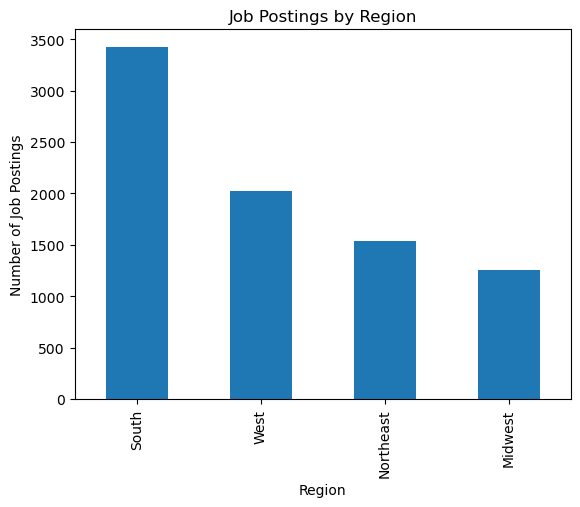

In [56]:
region_count = df['region'].value_counts()
# Plot the bar graph of job postings by region
region_count.plot(kind='bar')
plt.title('Job Postings by Region')
plt.xlabel('Region')
plt.ylabel('Number of Job Postings')
plt.show()

### Here we can see that the south region of the US has the most job openings according to the dataset, despite what we might normally think about the west and the north-east having the majority jobs.

# Job Skill Matching with User Skills

In [57]:
#testing skill fn
user_skills = ['Python', 'SQL', 'Node.js' , 'React.js']

# Call the function from analysis.py
matched_data = calculate_skill_match(df, user_skills)

# sort the DataFrame by the 'skill_match' column in descending order
sorted_data = matched_data.sort_values(by='skill_match', ascending=False)

# select the top 20 rows from the sorted DataFrame
top_matched = sorted_data.head(20)

# print the selected columns from the top 20 rows
print(top_matched[['title', 'company', 'location', 'skill_match', 'salary']])

                                                 title  \
4319                                  Python Developer   
2712                              Python MVC Developer   
491                    Senior Software Engineer (.NET)   
4624                                     .NET Engineer   
482               Software Engineer / .NET Environment   
5283                                  Python Developer   
2714                              Python MVC Developer   
2864                        Software Engineer - Python   
198                        Full Stack Python Developer   
2044              Mid level Backend Node-SQL Developer   
2045              Mid level Backend Node-SQL Developer   
5754                           Fullstack Web Developer   
6138                              Sr. Python Developer   
3108  Sr Software Engineer - Web, Merchant Integration   
8095                                 SAS SQL Developer   
8127        Application Developer III (.Net Developer)   
7908       .NE

# Show Jobs within a Salary Range

In [58]:
salary_range = '80000-100000'
top_matches = filter_jobs_by_salary_range(df, salary_range).head(10)
print(top_matches[['title', 'company', 'location', 'job_type', 'mean_salary']])

                                            title  \
36                       Software Engineer (.NET)   
72                              SOFTWARE ENGINEER   
180                  CNC Programmer and Scheduler   
191                  CNC Programmer and Scheduler   
194                  CNC Programmer and Scheduler   
282  Software Developer - C#, ASP.Net, SQL Server   
292                      Programmer Analyst - SAS   
293                      Programmer Analyst - SAS   
402                     Full Stack .Net Developer   
457                       .NET WinForms Developer   

                         company         location   job_type  mean_salary  
36               Vaco Technology    Charlotte, NC  Full Time      85000.0  
72      Xceleration Partners LLC    Charlotte, NC  Full Time      83000.0  
180                        Jobot  Statesville, NC  Full Time      87500.0  
191                        Jobot  Statesville, NC  Full Time      87500.0  
194                        Jobot  St

# Top skills in the jobs

In [59]:
# call function from analysis.py
top_skills = top_skills(df, n=15)

# Print the top skills
print(top_skills)

            count
sql          2208
java         2174
javascript   1953
.net         1773
api          1153
it           1148
python       1131
html         1065
c#           1020
oracle        671
asp           562
linux         555
sdlc          401
mysql         372
test          362


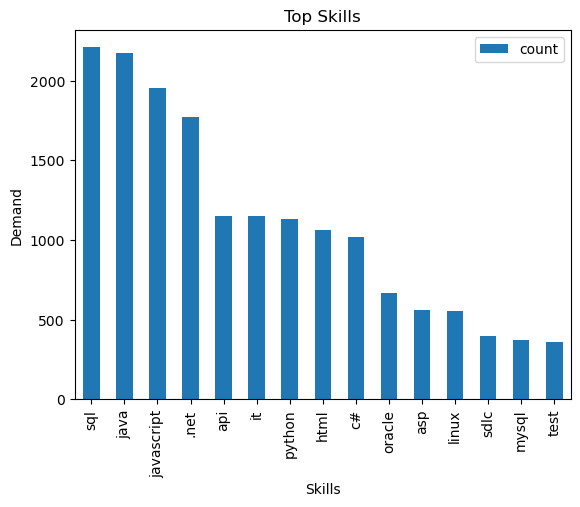

In [60]:
top_skills.plot(kind='bar')
plt.title('Top Skills')
plt.xlabel('Skills')
plt.ylabel('Demand')
plt.show()

# Most popular job title by State

   state                                              title  counts
4     CA                           Senior Software Engineer      54
45    VA                           Senior Software Engineer      28
43    TX                                     .Net Developer      24
38    PA                                     .Net Developer      21
22    MI                                  Software Engineer      12
23    MN                      Software Development Engineer      11
9     FL                           Senior Software Engineer      11
35    OH                                     .NET Developer      10
5     CO                           Senior Software Engineer      10
27    NC                               Software Engineer II      10
20    MD                                 Software Developer      10
10    GA                           Senior Software Engineer       9
47    WA                                  Software Engineer       9
31    NJ                                     .Ne

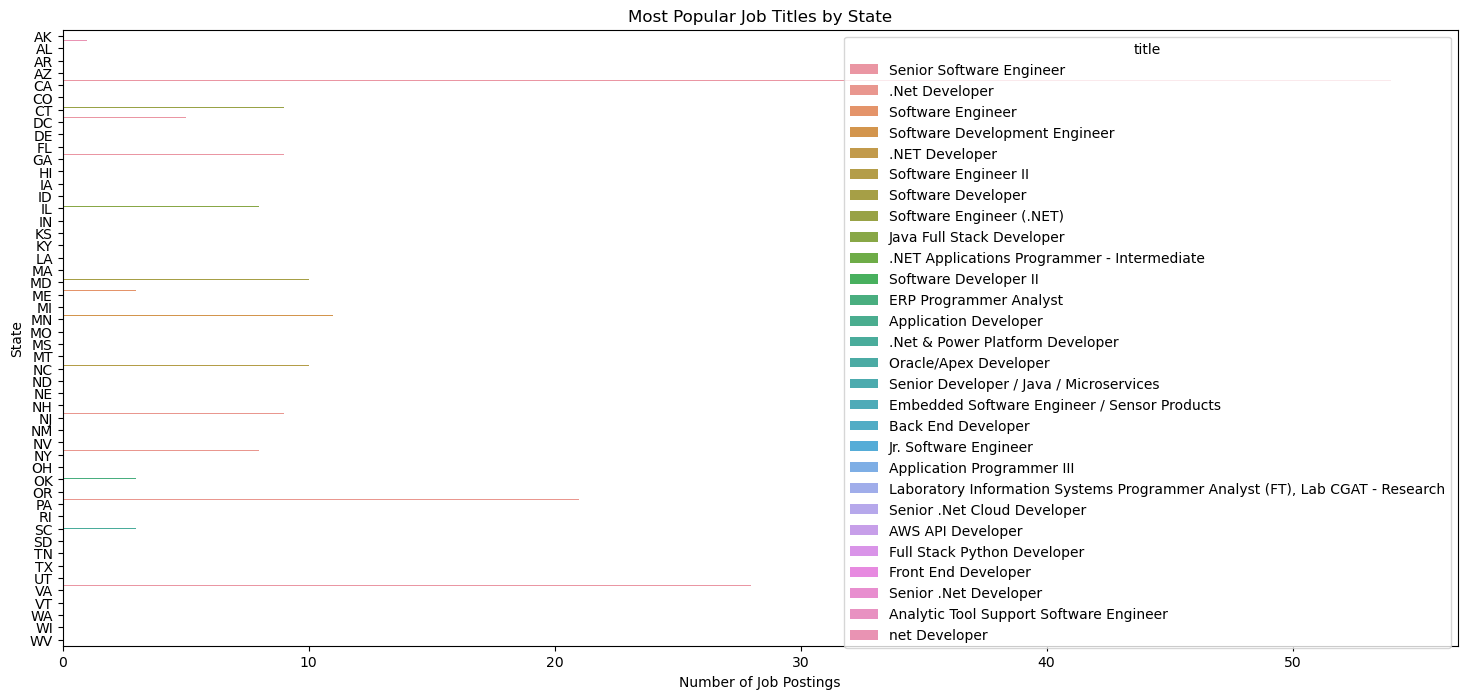

In [61]:
most_popular_jobs_by_state = jobs_by_state(df)
most_popular_jobs_by_state = most_popular_jobs_by_state[most_popular_jobs_by_state['counts'] > 0]
most_popular_jobs_by_state = most_popular_jobs_by_state.sort_values(by='counts', ascending=False)
print(most_popular_jobs_by_state)

# Create the plot
plt.figure(figsize=(18, 8))
sns.barplot(x='counts', y='state', hue='title', data=most_popular_jobs_by_state)
plt.title('Most Popular Job Titles by State')
plt.xlabel('Number of Job Postings')
plt.ylabel('State')
plt.show()

# Geographic Map of all Job Postings

In [62]:
# commented out because its a very heavy function which slows down the whole notebook. Attached screencshot in repository.
# map = create_job_map(df)
# map

# Mean Salary Distribution by Job Role

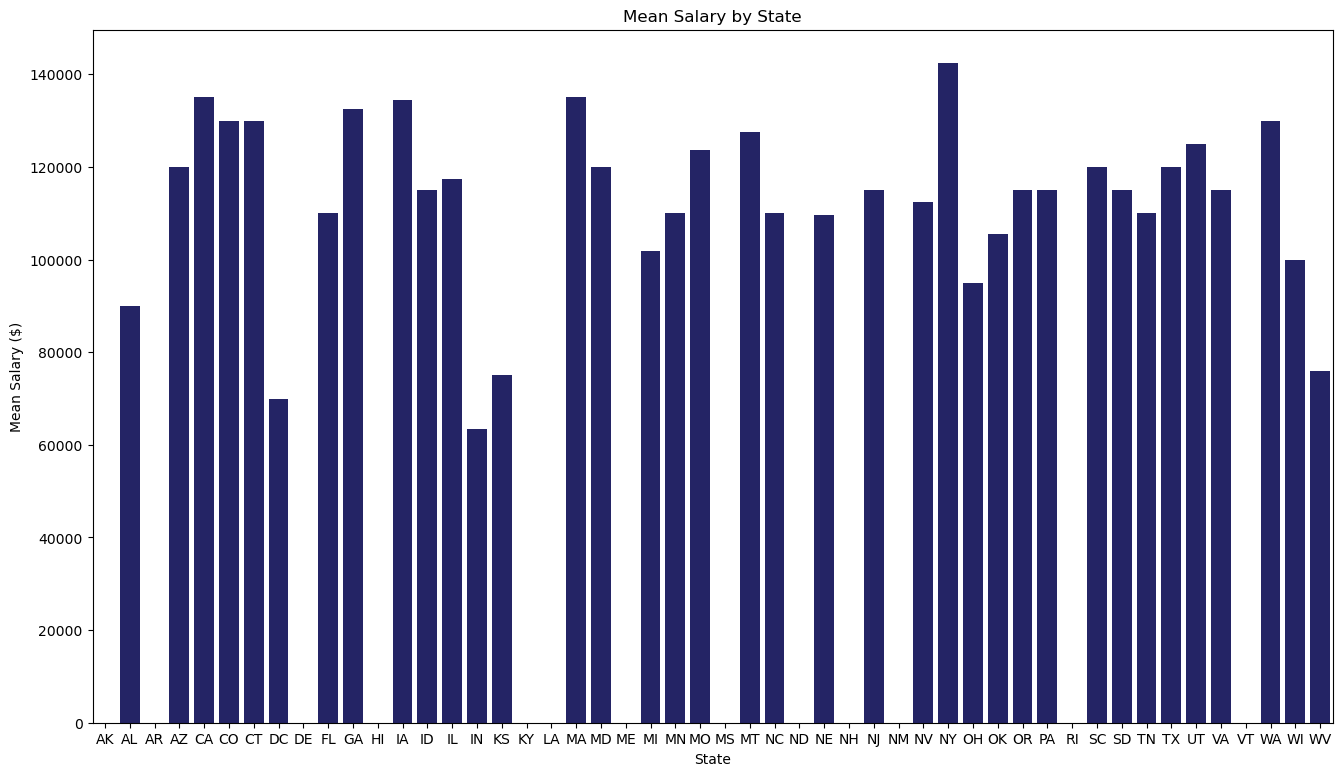

In [63]:
# calling function from analysis.py
plot_salary_distribution(df, "software")

# Cost of Living Analysis

In [64]:
cost_of_living_state_df = cost_of_living_df.groupby('state').agg({'cost_of_living_index': 'mean'}).reset_index()
cost_of_living_state_df.head()

,state,cost_of_living_index
0,AK,109.300000
1,AL,89.366667
2,AR,86.037500
3,AZ,100.387500
4,CA,125.746667


# Cost of Living Index By State Graph

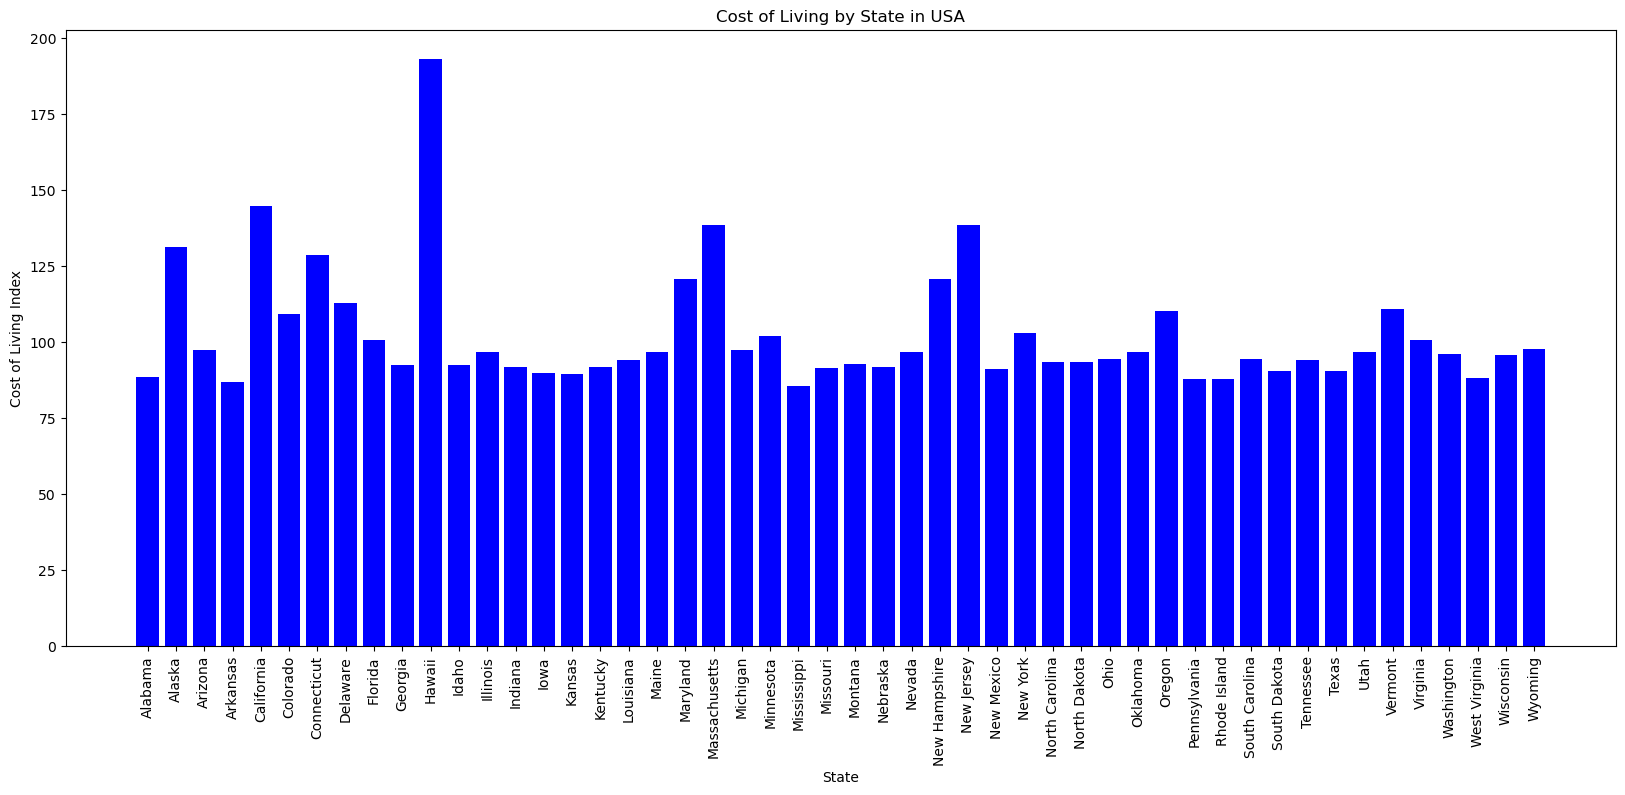

In [65]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

cost_of_living = [88.4, 131.3, 97.3, 86.9, 144.7, 109.3, 128.5, 112.8, 100.5, 92.5, 192.9, 92.4, 96.7, 91.8, 89.6, 89.4, 91.8, 93.9, 96.6, 120.7, 138.4, 97.4, 101.9, 85.6, 91.3, 92.7, 91.8, 96.6, 120.7, 138.4, 91.2, 102.9, 93.4, 93.4, 94.4, 96.6, 110.1, 87.9, 87.7, 94.2, 90.4, 94.1, 90.3, 96.6, 110.7, 100.5, 95.9, 88.1, 95.8, 97.5]
plt.figure(figsize=(20, 8))
plt.bar(states, cost_of_living, color='blue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Cost of Living Index')
plt.title('Cost of Living by State in USA')
plt.show()

# Adjusted Salary Calculated after normalising with cost of living (based on city)

In [66]:
# calling function from analysis.py
adjusted_sal_df = calculate_adjusted_salary(df, cost_of_living_df, cost_of_living_state_df)
print(adjusted_sal_df.info())
adjusted_sal_df.head(10)

D:\Studies\MSIM\Programming Analytics\Dice\2023Spr_projects\analysis.py:263: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.notna(job.mean_salary) and cli_df.city_state.str.contains('^'+job['city_state']+'$', regex=True).any():


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 8240
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   salary                  4152 non-null   string        
 1   description             8241 non-null   string        
 2   title                   8241 non-null   string        
 3   url                     8241 non-null   string        
 4   country                 8241 non-null   string        
 5   industry                8241 non-null   string        
 6   job_type                8241 non-null   string        
 7   longitude               8241 non-null   float64       
 8   currency                8241 non-null   category      
 9   education_requirements  8241 non-null   string        
 10  postal_code             8036 non-null   string        
 11  location                8241 non-null   string        
 12  skills                  8013 non-null   string  

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,...,city,region,division,min_salary,max_salary,frequency,min_annual_comp,max_annual_comp,mean_salary,adjusted_salary
0,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,Charlotte,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,Charlotte,South,South Atlantic,55.0,60.0,hourly,105600.0,115200.0,110400.0,112880.9
2,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,...,Raleigh,South,South Atlantic,80000.0,120000.0,yearly,80000.0,120000.0,100000.0,100401.2
3,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,Charlotte,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,<NA>,"Location: Raleigh, NC Duration: 12 Months Cont...",Sr. Azure Developer/Azure Consultant,https://www.dice.com/jobs/detail/Sr.-Azure-Dev...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-78.869280,USD,IT Diploma/Degree/Certification,...,Durham,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,depends on experience,Serverlogic clinet has an immediate opening fo...,Sr. Windows Engineer,https://www.dice.com/jobs/detail/Sr.-Windows-E...,US,IT Software,"Contract W2, Contract Independent",-79.791980,USD,IT Diploma/Degree/Certification,...,Greensboro,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,<NA>,Description AD Tools Specialist Key responsib...,Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract Corp-To-Corp, Contract W2",-80.828510,USD,IT Diploma/Degree/Certification,...,Charlotte,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,...,Charlotte,South,South Atlantic,55.0,60.0,hourly,105600.0,115200.0,110400.0,112880.9
8,<NA>,Piper Companies is currently seeking a Softwar...,"Software Engineer- Python, PHP",https://www.dice.com/jobs/detail/Software-Engi...,US,IT Software,Full Time,-78.635140,USD,IT Diploma/Degree/Certification,...,Raleigh,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,depends on experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,...,Charlotte,South,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Skill Cooccurrence Analysis

In [67]:
sk1 = skill_co_occ(connecting_df)
sk1 = sk1.rename(columns={'job_id': 'co-occurrence'})

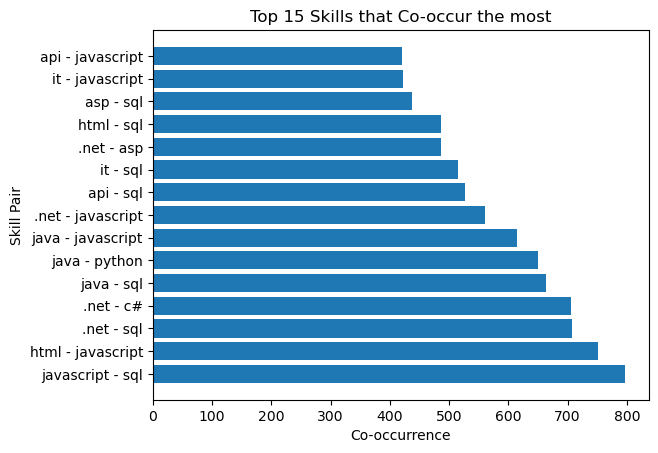

In [68]:
top_pairs = sk1.head(15)

# Create a bar chart of the top pairs
plt.barh(top_pairs['skill_x'] + ' - ' + top_pairs['skill_y'], top_pairs['co-occurrence'])

plt.title('Top 15 Skills that Co-occur the most')
plt.xlabel('Co-occurrence')
plt.ylabel('Skill Pair')
plt.show()